In [39]:
import pandas as pd
import numpy as np 
from gpxutils import parse_gpx 
import matplotlib.pyplot as plt
%matplotlib inline

# Analysis of Cycling Data

We are provided with four files containing recordings of cycling activities that include GPS location data as
well as some measurements related to cycling performace like heart rate and power.  The goal is to perform
some exploration and analysis of this data. 

The data represents four races.  Two are time trials where the rider rides alone on a set course.  Two are 
road races where the rider rides with a peleton.  All were held on the same course but the road races include
two laps where the time trials include just one. 

Questions to explore with the data:
* What is the overall distance travelled for each of the rides? What are the average speeds etc.  Provide a summary for each ride.
* Compare the range of speeds for each ride, are time trials faster than road races? 
* Compare the speeds achieved in the two time trials (three years apart).  As well as looking at the averages, can you see where in the ride one or the other is faster.  
* From the elevation_gain field you can see whether the rider is _climbing_ , _descending_ or on the _flat_.   Use this to calculate the average speeds in those three cases (climbing, flat or descending).  Note that _flat_ might not be zero elevation_gain but might allow for slight climbs and falls.  

For time varying data like this it is often useful to _smooth_ the data using eg. a [rolling mean](https://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.rolling_mean.html).  You might want to experiment with smoothing in some of your analysis (not required but may be of interest).

## Description of Fields

* _index_ is a datetime showing the time that the observation was made (I wasn't riding at night, this is converted to UTC)
* __latitude, longitude, elevation__ from the GPS, the position of the rider at each timepoint, elevation in m
* __temperature__ the current ambient temperature in degrees celcius
* __power__ the power being generated by the rider in Watts
* __cadence__ the rotational speed of the pedals in revolutions per minute
* __hr__ heart rate in beats per minute
* __elevation_gain__ the change in elevation in m between two observations
* __distance__ distance travelled between observations in km
* __speed__ speed measured in km/h

You are provided with code in [gpxutils.py](gpxutils.py) to read the GPX XML format files that are exported by cycling computers and applications.  The sample files were exported from [Strava](https://strava.com/) and represent four races by Steve Cassidy.


In [40]:
# read the four data files
rr_2016 = parse_gpx('files/Calga_RR_2016.gpx')
tt_2016 = parse_gpx('files/Calga_TT_2016.gpx')
rr_2019 = parse_gpx('files/Calga_RR_2019.gpx')
tt_2019 = parse_gpx('files/Calga_TT_2019.gpx')

In [41]:
# first five rows of the dataframe
rr_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-05-14 04:02:41+00:00,-33.415561,151.222303,208.6,29.0,0.0,40.0,102.0,0.000000,0.0,0.000000,NaN
2016-05-14 04:02:42+00:00,-33.415534,151.222289,208.6,29.0,0.0,40.0,102.0,0.003271,0.0,11.777020,1.0
2016-05-14 04:02:46+00:00,-33.415398,151.222180,208.6,29.0,0.0,40.0,103.0,0.018194,0.0,16.375033,4.0
2016-05-14 04:02:49+00:00,-33.415264,151.222077,208.6,29.0,0.0,55.0,106.0,0.017703,0.0,21.243901,3.0
2016-05-14 04:02:51+00:00,-33.415160,151.222013,208.6,29.0,0.0,61.0,109.0,0.013001,0.0,23.401217,2.0


In [56]:
# first five rows of the dataframe
tt_2016.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:05:30+00:00,-33.415971,151.222016,111.8,12.0,0.0,58.0,108.0,0.000000,0.0,0.000000,NaN
2016-07-02 23:05:32+00:00,-33.416026,151.222008,111.8,12.0,0.0,58.0,105.0,0.006161,0.0,11.089134,2.0
2016-07-02 23:05:38+00:00,-33.416034,151.222023,111.8,12.0,0.0,58.0,105.0,0.001652,0.0,0.991282,6.0
2016-07-02 23:06:01+00:00,-33.416041,151.222038,111.8,13.0,0.0,58.0,100.0,0.001595,0.0,0.249655,23.0
2016-07-02 23:06:02+00:00,-33.416048,151.222053,111.8,13.0,0.0,65.0,101.0,0.001595,0.0,5.742071,1.0


In [43]:
# first five rows of the dataframe
rr_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-22 22:33:45+00:00,-33.416592,151.222853,215.0,0.0,0.0,58.0,71.0,0.000000,0.0,0.000000,NaN
2019-06-22 22:33:46+00:00,-33.416629,151.222877,215.0,0.0,147.0,58.0,71.0,0.004679,0.0,16.842677,1.0
2019-06-22 22:33:47+00:00,-33.416677,151.222905,214.8,0.0,97.0,60.0,71.0,0.005936,-0.2,21.371074,1.0
2019-06-22 22:33:48+00:00,-33.416730,151.222937,214.8,0.0,74.0,61.0,71.0,0.006599,0.0,23.757913,1.0
2019-06-22 22:33:49+00:00,-33.416783,151.222972,214.8,0.0,136.0,62.0,71.0,0.006729,0.0,24.225566,1.0


In [44]:
# first five rows of the dataframe
tt_2019.head()

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2019-06-01 22:54:55+00:00,-33.415798,151.222060,219.4,13.0,0.0,0.0,88.0,0.000000,0.0,0.000000,NaN
2019-06-01 22:54:56+00:00,-33.415782,151.222051,219.4,13.0,0.0,0.0,88.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:57+00:00,-33.415767,151.222041,219.4,13.0,0.0,0.0,88.0,0.001909,0.0,6.871582,1.0
2019-06-01 22:54:58+00:00,-33.415751,151.222032,219.4,13.0,0.0,0.0,89.0,0.001965,0.0,7.075656,1.0
2019-06-01 22:54:59+00:00,-33.415735,151.222022,219.4,13.0,0.0,0.0,89.0,0.002007,0.0,7.223997,1.0


### Summary of Each Ride
***The function for the summary of each ride***

In [50]:
def summary(dataframe):
    print("Total number of records in the ride:", len(dataframe))
    print("Total time used for the ride (in second):", dataframe['timedelta'].sum())
    print("The overall distance of the ride (in km):", dataframe['distance'].sum())
    print("The average distance of the ride (in km):", dataframe['distance'].mean())
    print("The longest distance of the ride (in km):", dataframe['distance'].max())
    print("The shortest distance of the ride (in km):", (dataframe['distance'].loc[dataframe['distance'] != 0.0]).min()) # shortest but is not equal to 0
    print("The average speed of the ride (in km/h):", dataframe['speed'].mean())
    print("The fastest speed of the ride (in km/h):", dataframe['speed'].max())
    print("The slowest speed of the ride (in km/h):", (dataframe['speed'].loc[dataframe['speed'] != 0.0]).min()) # slowest but is not equal to 0
    print("The average heart rate (in beats per minute):", dataframe['hr'].mean())
    print("The highest heart rate (in beats per minute):", dataframe['hr'].max())
    print("The lowest heart rate (in beats per minute):", dataframe['hr'].min())

* *First ride: the 2016 road race*

In [51]:
summary(rr_2016)

Total number of records in the ride: 2822
Total time used for the ride (in second): 5200.0
The overall distance of the ride (in km): 49.04858574628638
The average distance of the ride (in km): 0.017380788712362302
The longest distance of the ride (in km): 0.07628260675759571
The shortest distance of the ride (in km): 0.003271394458699917
The average speed of the ride (in km/h): 34.93308475482947
The fastest speed of the ride (in km/h): 92.74903649913952
The slowest speed of the ride (in km/h): 8.62340892533519
The average heart rate (in beats per minute): 158.39440113394755
The highest heart rate (in beats per minute): 205.0
The lowest heart rate (in beats per minute): 102.0


* *Second ride: the 2016 time trial*


In [52]:
summary(tt_2016)

Total number of records in the ride: 1541
Total time used for the ride (in second): 2747.0
The overall distance of the ride (in km): 24.80288703130808
The average distance of the ride (in km): 0.016095319293515962
The longest distance of the ride (in km): 0.28817489548339187
The shortest distance of the ride (in km): 0.0015950196011899993
The average speed of the ride (in km/h): 33.52996304869014
The fastest speed of the ride (in km/h): 162.50576377606754
The slowest speed of the ride (in km/h): 0.2496552572030572
The average heart rate (in beats per minute): 170.93964957819597
The highest heart rate (in beats per minute): 251.0
The lowest heart rate (in beats per minute): 100.0


* *Third ride: the 2019 road race*

In [53]:
summary(rr_2019)

Total number of records in the ride: 5503
Total time used for the ride (in second): 5502.0
The overall distance of the ride (in km): 51.7891325359606
The average distance of the ride (in km): 0.009411072603300125
The longest distance of the ride (in km): 0.01954735241204344
The shortest distance of the ride (in km): 0.0018716501203288423
The average speed of the ride (in km/h): 33.87986137188044
The fastest speed of the ride (in km/h): 70.37046868335639
The slowest speed of the ride (in km/h): 6.737940433183832
The average heart rate (in beats per minute): 138.99854624750137
The highest heart rate (in beats per minute): 170.0
The lowest heart rate (in beats per minute): 71.0


* *Fourth ride: the 2019 time trial*

In [54]:
summary(tt_2019)

Total number of records in the ride: 2655
Total time used for the ride (in second): 2654.0
The overall distance of the ride (in km): 24.38014504376575
The average distance of the ride (in km): 0.009182728830043601
The longest distance of the ride (in km): 0.017583537256095835
The shortest distance of the ride (in km): 0.0019087728602351173
The average speed of the ride (in km/h): 33.05782378815691
The fastest speed of the ride (in km/h): 63.300734121945005
The slowest speed of the ride (in km/h): 6.871582296846422
The average heart rate (in beats per minute): 152.74124293785312
The highest heart rate (in beats per minute): 166.0
The lowest heart rate (in beats per minute): 88.0


**Interpretation:** From the summary above, we can notice that there are several records which may be considered as outliers. For example, the minimum speed of the 2016 time trial dataset was only 0.2497 km in an hour and the maximum speed was 162.5058 km in an hour, while the average speed is around 33.53 km in an hour. The same situation could be seen in heart rate of the same dataset, which the maximum heart rate is up to 251.0 beats per minute; this record is extremely higher than the [target heart rate zone of adults when exercising](https://my.clevelandclinic.org/health/diagnostics/17402-pulse--heart-rate) (maximum heart rate in all ages is just 170 beats per minute normally). Therefore, the heart rate which is up to 251.0 beats per minute is not a reasonably normal heart rate even when an individual is exercising hard. As a result, these records might be considered as outliers (not only just in the 2016 tme trial dataset).

### Data Manipulation

***Missing value***

We check if there is any missing value in each dataset in any field.

In [92]:
# missing value in the 2016 road race 
rr_2016.isna().sum()

latitude          0
longitude         0
elevation         0
temperature       0
power             0
cadence           0
hr                0
distance          0
elevation_gain    0
speed             0
timedelta         1
dtype: int64

In [93]:
# missing value in the 2016 time trial
tt_2016.isna().sum()

latitude          0
longitude         0
elevation         0
temperature       0
power             0
cadence           0
hr                0
distance          0
elevation_gain    0
speed             0
timedelta         1
dtype: int64

In [94]:
# missing value in the 2019 road race 
rr_2019.isna().sum()

latitude          0
longitude         0
elevation         0
temperature       0
power             0
cadence           0
hr                0
distance          0
elevation_gain    0
speed             0
timedelta         1
dtype: int64

In [95]:
# missing value in the 2019 road race 
tt_2019.isna().sum()

latitude          0
longitude         0
elevation         0
temperature       0
power             0
cadence           0
hr                0
distance          0
elevation_gain    0
speed             0
timedelta         1
dtype: int64

**Interpretation:** The only NaN value in each dataset is the time delta. From observation we could see that the NaN time delta appears at the first record of each dataset, where there is no previous record for calculating the time difference between two observations.

***Plotting to check the if there is any outlier in each dataset***

* **Distance**

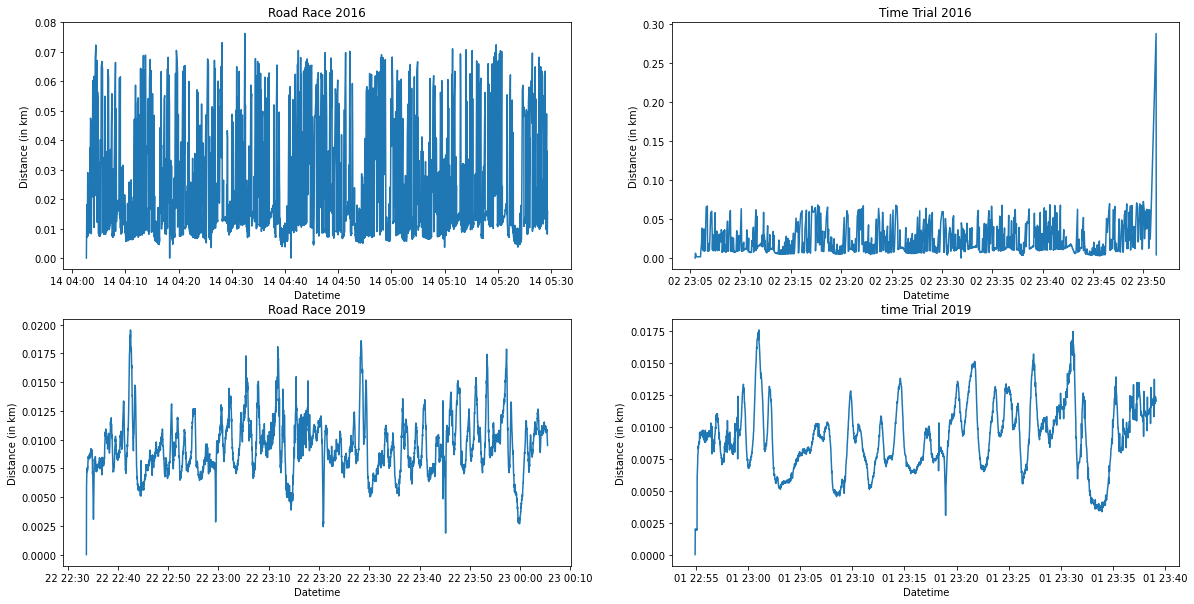

In [61]:
plt.figure(figsize=(20,10))

# rr_2016
plt.subplot(2,2,1)
plt.title("Road Race 2016")
plt.xlabel("Datetime")
plt.ylabel("Distance (in km)")
plt.plot(rr_2016['distance'])

# tt_2016
plt.subplot(2,2,2)
plt.title("Time Trial 2016")
plt.xlabel("Datetime")
plt.ylabel("Distance (in km)")
plt.plot(tt_2016['distance'])

# rr_2019
plt.subplot(2,2,3)
plt.title("Road Race 2019")
plt.xlabel("Datetime")
plt.ylabel("Distance (in km)")
plt.plot(rr_2019['distance'])

# tt_2019
plt.subplot(2,2,4)
plt.title("time Trial 2019")
plt.xlabel("Datetime")
plt.ylabel("Distance (in km)")
plt.plot(tt_2019['distance'])

**Interpretation:** the 'distance' of the 2016 road race,the 2019 road race and the 2019 time trial datasets seem not to have any outlier except for 0 (the beginning of each ride) as the plot show that all the records distribute quite balance around the mean value. However, the time trial 2016 might have outlier at the end of the plot where the distance is up to nearly 0.30 km, while the mean value is around 0.02 km.

**Dealing with outliers**

Firstly, we will work at the dataset tt_2016 (i.e. the 2016 time trial).

As the mean value of distance in this dataset is around 0.02 km, we assume the maximum value of the distance should not be over 0.1km (i.e. we are only interest the distance records from 0.0016 (the minimum distance except 0) to 0.1 km). We choose 0.1km as maximum because almost all the records of distance surround the mean value vary within this range, and they distribute quite balance.

In [105]:
# count the number of records which is over 0.1km
print("The number of distance outliers of tt_2016:",tt_2016['distance'][tt_2016.distance > 0.1].value_counts().sum())

The number of distance outliers of tt_2016: 1


In [106]:
# print out the record of outlier
outlier = tt_2016.drop(tt_2016.index[tt_2016['distance']<=0.1])
outlier

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:51:16+00:00,-33.418333,151.223478,108.0,11.0,0.0,64.0,143.0,0.288175,-7.4,33.465472,31.0


In [107]:
# check the record of maximum timedelta
tt_2016.drop(tt_2016.index[tt_2016['timedelta']!= tt_2016['timedelta'].max()])

,latitude,longitude,elevation,temperature,power,cadence,hr,distance,elevation_gain,speed,timedelta
2016-07-02 23:51:16+00:00,-33.418333,151.223478,108.0,11.0,0.0,64.0,143.0,0.288175,-7.4,33.465472,31.0


In [99]:
# check if the mean of the 'distance' of tt_2016 is significant different when removing outlier
cleaned_mean = tt_2016['distance'].drop(tt_2016.index[tt_2016['distance']>0.1]).mean()
print("the original mean value before removing outlier", tt_2016['distance'].mean())
print("the mean value after removing outlier", cleaned_mean)

the original mean value before removing outlier 0.016095319293515962
the mean value after removing outlier 0.01591864424404202


**Interpretation:** It is reasonable that the distance is normal since the time delta (time period between the two observations) is up to 31 seconds, which is the maximum of the whole dataset. However, the average value of the distance will not be affected significantly even if we remove this outlier. Also, there is only one over 1541 records which is over 0.1km, and we are interested in almost all the records which are surround the mean and within the range from 0.0016 to 0.1km. Therefore, we would consider the record of 0.288175km as an outlier and remove it instead of changing the value to the mean value (as we cannot ensure that whether the mean value is fit for the speed or even the largest timedelta in this dataset, it is better to be removed without affect too much on average).

Secondly, we remove the records of four datasets which contain 0 in the 'distance', since they do not contribute to the average mean of the distance. Also, the analysis mostly focuses on the change between observation in various field (speed, distance, etc.). The value 0 means there is no change in the distance. Thus, we are not interested in a record which has 0km in distance as an outlier (either the beginning of the ride, or when the cyclist has a break during the ride), and remove the outlier since they have not effect on the dataset (no change).

In [125]:
# count the number of records which have 0km in distance

# rr_2016
print("The number of 0km distance of rr_2016:", rr_2016['distance'][rr_2016.distance == 0.0].value_counts().sum())
print("The records of 0km distance of rr_2016:")
print(rr_2016.drop(rr_2016.index[rr_2016['distance']!=0.0]))

# tt_2016
print("\nThe number of 0km distance of tt_2016:", tt_2016['distance'][tt_2016.distance == 0.0].value_counts().sum())
print("The records of 0km distance of tt_2016:")
print(tt_2016.drop(tt_2016.index[tt_2016['distance']!=0.0]))

The number of 0km distance of rr_2016: 3
The records of 0km distance of rr_2016:
                            latitude   longitude  elevation  temperature  \
2016-05-14 04:02:41+00:00 -33.415561  151.222303      208.6         29.0   
2016-05-14 04:18:20+00:00 -33.350502  151.229872      248.0         27.0   
2016-05-14 04:41:09+00:00 -33.395848  151.215595      218.4         25.0   

                           power  cadence     hr  distance  elevation_gain  \
2016-05-14 04:02:41+00:00    0.0     40.0  102.0       0.0             0.0   
2016-05-14 04:18:20+00:00    0.0     76.0  150.0       0.0             0.0   
2016-05-14 04:41:09+00:00    0.0     83.0  171.0       0.0            -0.4   

                           speed  timedelta  
2016-05-14 04:02:41+00:00    0.0        NaN  
2016-05-14 04:18:20+00:00    0.0        2.0  
2016-05-14 04:41:09+00:00    0.0        1.0  

The number of 0km distance of tt_2016: 2
The records of 0km distance of tt_2016:
                            latitud

### **Second Question: Compare the Range of Speed for Each Rides**

***Brief summary of speed for each ride***

In [12]:
# summary of rr_2016 speed
print("Summary of speed for the 2016 road race:\n")
print(rr_2016['speed'].describe())

# summary of tt_2016 speed
print("\nSummary of speed for the 2016 time trial:")
print(tt_2016['speed'].describe())

# summary of rr_2019 speed
print("\nSummary of speed for the 2019 road race:\n")
print(rr_2019['speed'].describe())

# summary of tt_2019 speed
print("\nSummary of speed for the 2019 time trial:\n")
print(tt_2019['speed'].describe())

Summary of speed for the 2016 road race:

count    2822.000000
mean       34.933085
std        10.738677
min         0.000000
25%        26.656312
50%        33.307339
75%        42.871885
max        92.749036
Name: speed, dtype: float64

Summary of speed for the 2016 time trial:
count    1541.000000
mean       33.529963
std        11.519681
min         0.000000
25%        25.068271
50%        32.840076
75%        41.470522
max       162.505764
Name: speed, dtype: float64

Summary of speed for the 2019 road race:

count    5503.000000
mean       33.879861
std         8.853503
min         0.000000
25%        28.219962
50%        33.041360
75%        38.640026
max        70.370469
Name: speed, dtype: float64

Summary of speed for the 2019 time trial:

count    2655.000000
mean       33.057824
std         9.773522
min         0.000000
25%        26.440757
50%        33.220108
75%        39.286242
max        63.300734
Name: speed, dtype: float64


***Plot the means of four rides***

In [13]:
# the dataframe include the means of the four rides
mean= {'ride': ['road_race_2016', 'time_trial_2016', 'road_race_2019', 'time_trial_2019'],
       'mean': [rr_2016['speed'].mean(), tt_2016['speed'].mean(), rr_2019['speed'].mean(), tt_2019['speed'].mean()]}
df_mean= pd.DataFrame(mean)
print("the average speed of the four ride:")
print(df_mean)

the average speed of the four ride:
              ride       mean
0   road_race_2016  34.933085
1  time_trial_2016  33.529963
2   road_race_2019  33.879861
3  time_trial_2019  33.057824


(32.0, 36.0)

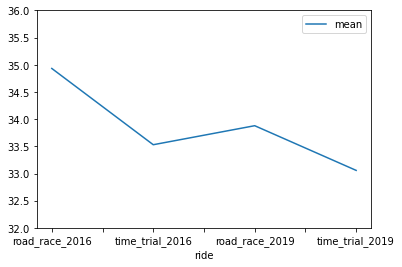

In [14]:
# plot the average speed of the four rides
df_mean.plot(kind='line', x='ride', y='mean')
plt.ylim(32,36)

***Interpretation from the plotting of the mean***

From the summary and the graph above, the highest speed can be seen in the road race 2016 (around 35 km/h). Also, the second high average speed is the road race 2019, which is around 33.9 km/h. Finally, the average speed of the two time trials (one in 2016 and one in 2019) is around 33.5 km/h and 33 km/h respectively. Therefore, the time trials are not faster than the road races in average. 

## Challenge: Gear Usage

A modern race bike has up to 22 different gears with two chainrings on the front (attached to the pedals) and 10 or 11 at the back (attached to the wheel).   The ratio of the number of teeth on the front and rear cogs determines the distance travelled with one revolution of the pedals (often called __development__, measured in metres).  Low development is good for climbing hills while high development is for going fast downhill or in the final sprint. 

We have a measure of the number of rotations of the pedals per minute (__cadence__) and a measure of __speed__.  Using these two variables we should be able to derive a measure of __development__ which would effectivly tell us which gear the rider was using at the time.   Development will normally range between __2m__ and __10m__.  Due to errors in GPS and cadence measurements you will see many points outside this range and you should just discard them as outliers. 

Write code to calculate __development__ in _meters_ for each row in a ride.  Plot the result in a _histogram_ and compare the plots for the four rides.   Comment on what you observe in the histograms.



